##                              A Study of member Attrition Prediction:   


* Goal is to predict the churn for a website based on the features provided in the dataset.

* Customer will EXIT(1) or NOT(0), and    identify customers who are likely to leave so that
  
* we can retain then with some    special   offers on membership.

# Table of Contents:-

### 1.Import Libraries

### 2.Exploratory Data Analysis
  * Data Dimension
  * Data Types
  * Summary Statistics
  * Correlation
  * Data Distribution
  * Data Distribution(Features)
  * Data Distribution(Target)


### 3.Data Pre-Processing
 * Missing Values
 * Missing values imputation
 
 * Duplicate Data
### Outliers
  * Discovery of Outliers
  * Visualizing outliers using Boxplots
  * Removal of Outliers
  
### Categorical Data Encoding
### Feature Scaling  
  * Standard Scaling

## Model Building
 * Logistic Regression
 * Naive Bayes
 * K nearest neighbors (KNN)
 * Random Forest
 * AdaBoost
 * XGBoost
 * Tree

## conclusion

##  1.Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [6]:
data = pd.read_csv("churn.csv")

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df = data.drop(['referral_id','security_no','joining_date','last_visit_time'], axis=1)

In [9]:
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,NaN,Wi-Fi,17.0,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,No
1,32,F,City,Premium Membership,NaN,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,No
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,Yes
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,Yes
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,NaN,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2.0,-650.682758,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,Yes
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13.0,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,Yes
36989,23,F,NaN,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12.0,154.940000,38127.56,NaN,680.470000,No,Yes,Yes,Unsolved,Poor Website,Yes
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15.0,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,No


In [10]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [11]:
print(f'There are {df.shape[0]} data points and {df.shape[1]} features in the dataset')


There are 36992 data points and 19 features in the dataset


In [12]:
df.shape

(36992, 19)

## Data Information:-

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36933 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       31554 non-null  object 
 5   preferred_offer_types         36704 non-null  object 
 6   medium_of_operation           31599 non-null  object 
 7   internet_option               36992 non-null  object 
 8   days_since_last_login         34993 non-null  float64
 9   avg_time_spent                36992 non-null  float64
 10  avg_transaction_value         36992 non-null  float64
 11  avg_frequency_login_days      33470 non-null  float64
 12  points_in_wallet              33549 non-null  float64
 13  u

### Summary of Data:-

In [15]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,34993.000000,36992.000000,36992.000000,33470.000000,33549.000000
mean,37.118161,12.758552,243.472334,29271.194003,15.976715,686.882199
std,15.867412,5.572600,398.289149,19444.806226,9.215858,194.063624
min,10.000000,1.000000,-2814.109110,800.460000,-43.652702,-760.661236
25%,23.000000,9.000000,60.102500,14177.540000,9.000000,616.150000
50%,37.000000,13.000000,161.765000,27554.485000,16.000000,697.620000
75%,51.000000,17.000000,356.515000,40855.110000,23.000000,763.950000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


## Value_count

In [163]:
def value_count(x):
    print(df[x].value_counts())
    return x

In [167]:
value_count('gender')

Gender value_counts
F    18549
M    18443
Name: gender, dtype: int64


'gender'

In [168]:
value_count('region_category')

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64


'region_category'

In [169]:
value_count('membership_category')

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64


'membership_category'

In [170]:
value_count('joined_through_referral')

No     21277
Yes    15715
Name: joined_through_referral, dtype: int64


'joined_through_referral'

In [171]:
value_count('joined_through_referral')

No     21277
Yes    15715
Name: joined_through_referral, dtype: int64


'joined_through_referral'

In [173]:
value_count('internet_option')

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64


'internet_option'

In [174]:
value_count('used_special_discount')

Yes    20342
No     16650
Name: used_special_discount, dtype: int64


'used_special_discount'

In [176]:
value_count('offer_application_preference')

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64


'offer_application_preference'

In [177]:
value_count('past_complaint')

No     18602
Yes    18390
Name: past_complaint, dtype: int64


'past_complaint'

In [180]:
value_count('complaint_status')

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


'complaint_status'

In [181]:
value_count('feedback')

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


'feedback'

In [182]:
value_count('churn_risk_score')

Yes    20012
No     16980
Name: churn_risk_score, dtype: int64


'churn_risk_score'

# univariante:-

## 1. Catergorical Variable:-

In [18]:
df_cat1 = df.select_dtypes(include='object').head() 

##### *Exact the catergorical variable from data

### Count Plots:

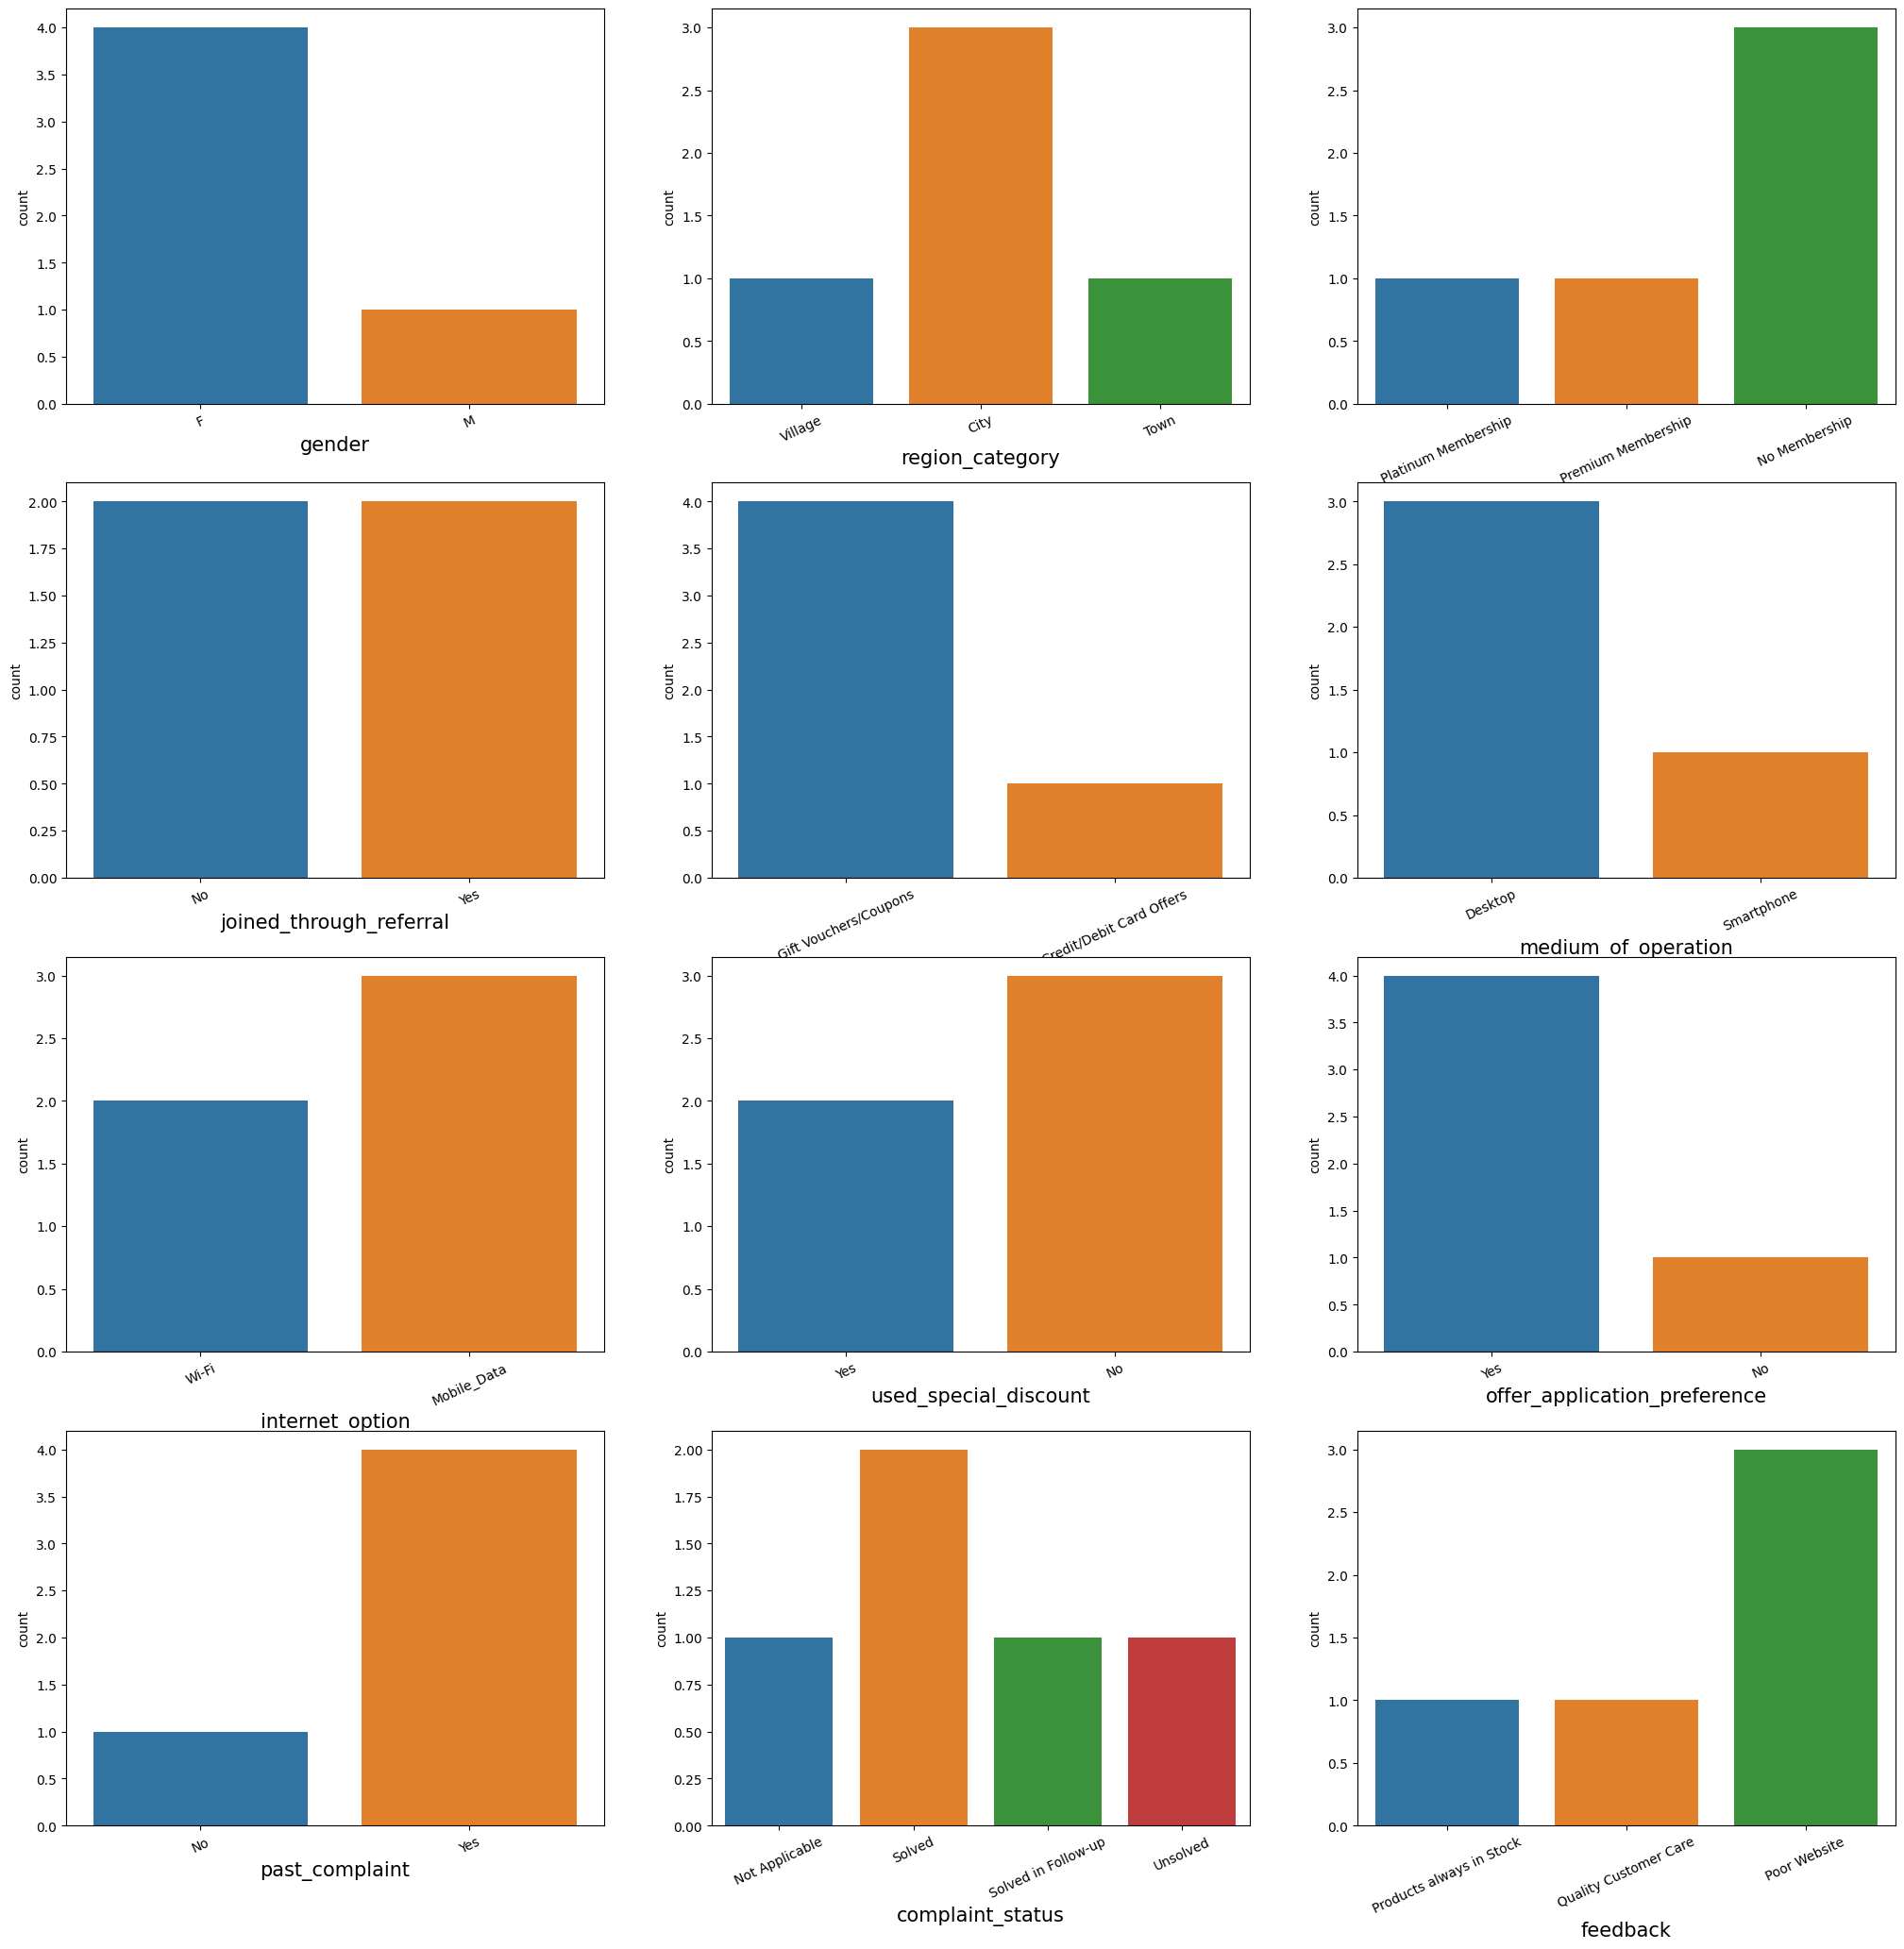

In [20]:

fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(25, 25)) 

for variable, subplot in zip(df_cat1.columns,ax.flatten()):
    
    z = sns.countplot(x = df_cat1[variable],ax=subplot )
    
    z.set_xlabel(variable, fontsize = 15)
    
    z.set_xticklabels(z.get_xticklabels(),rotation=25)

# Bivariante:-

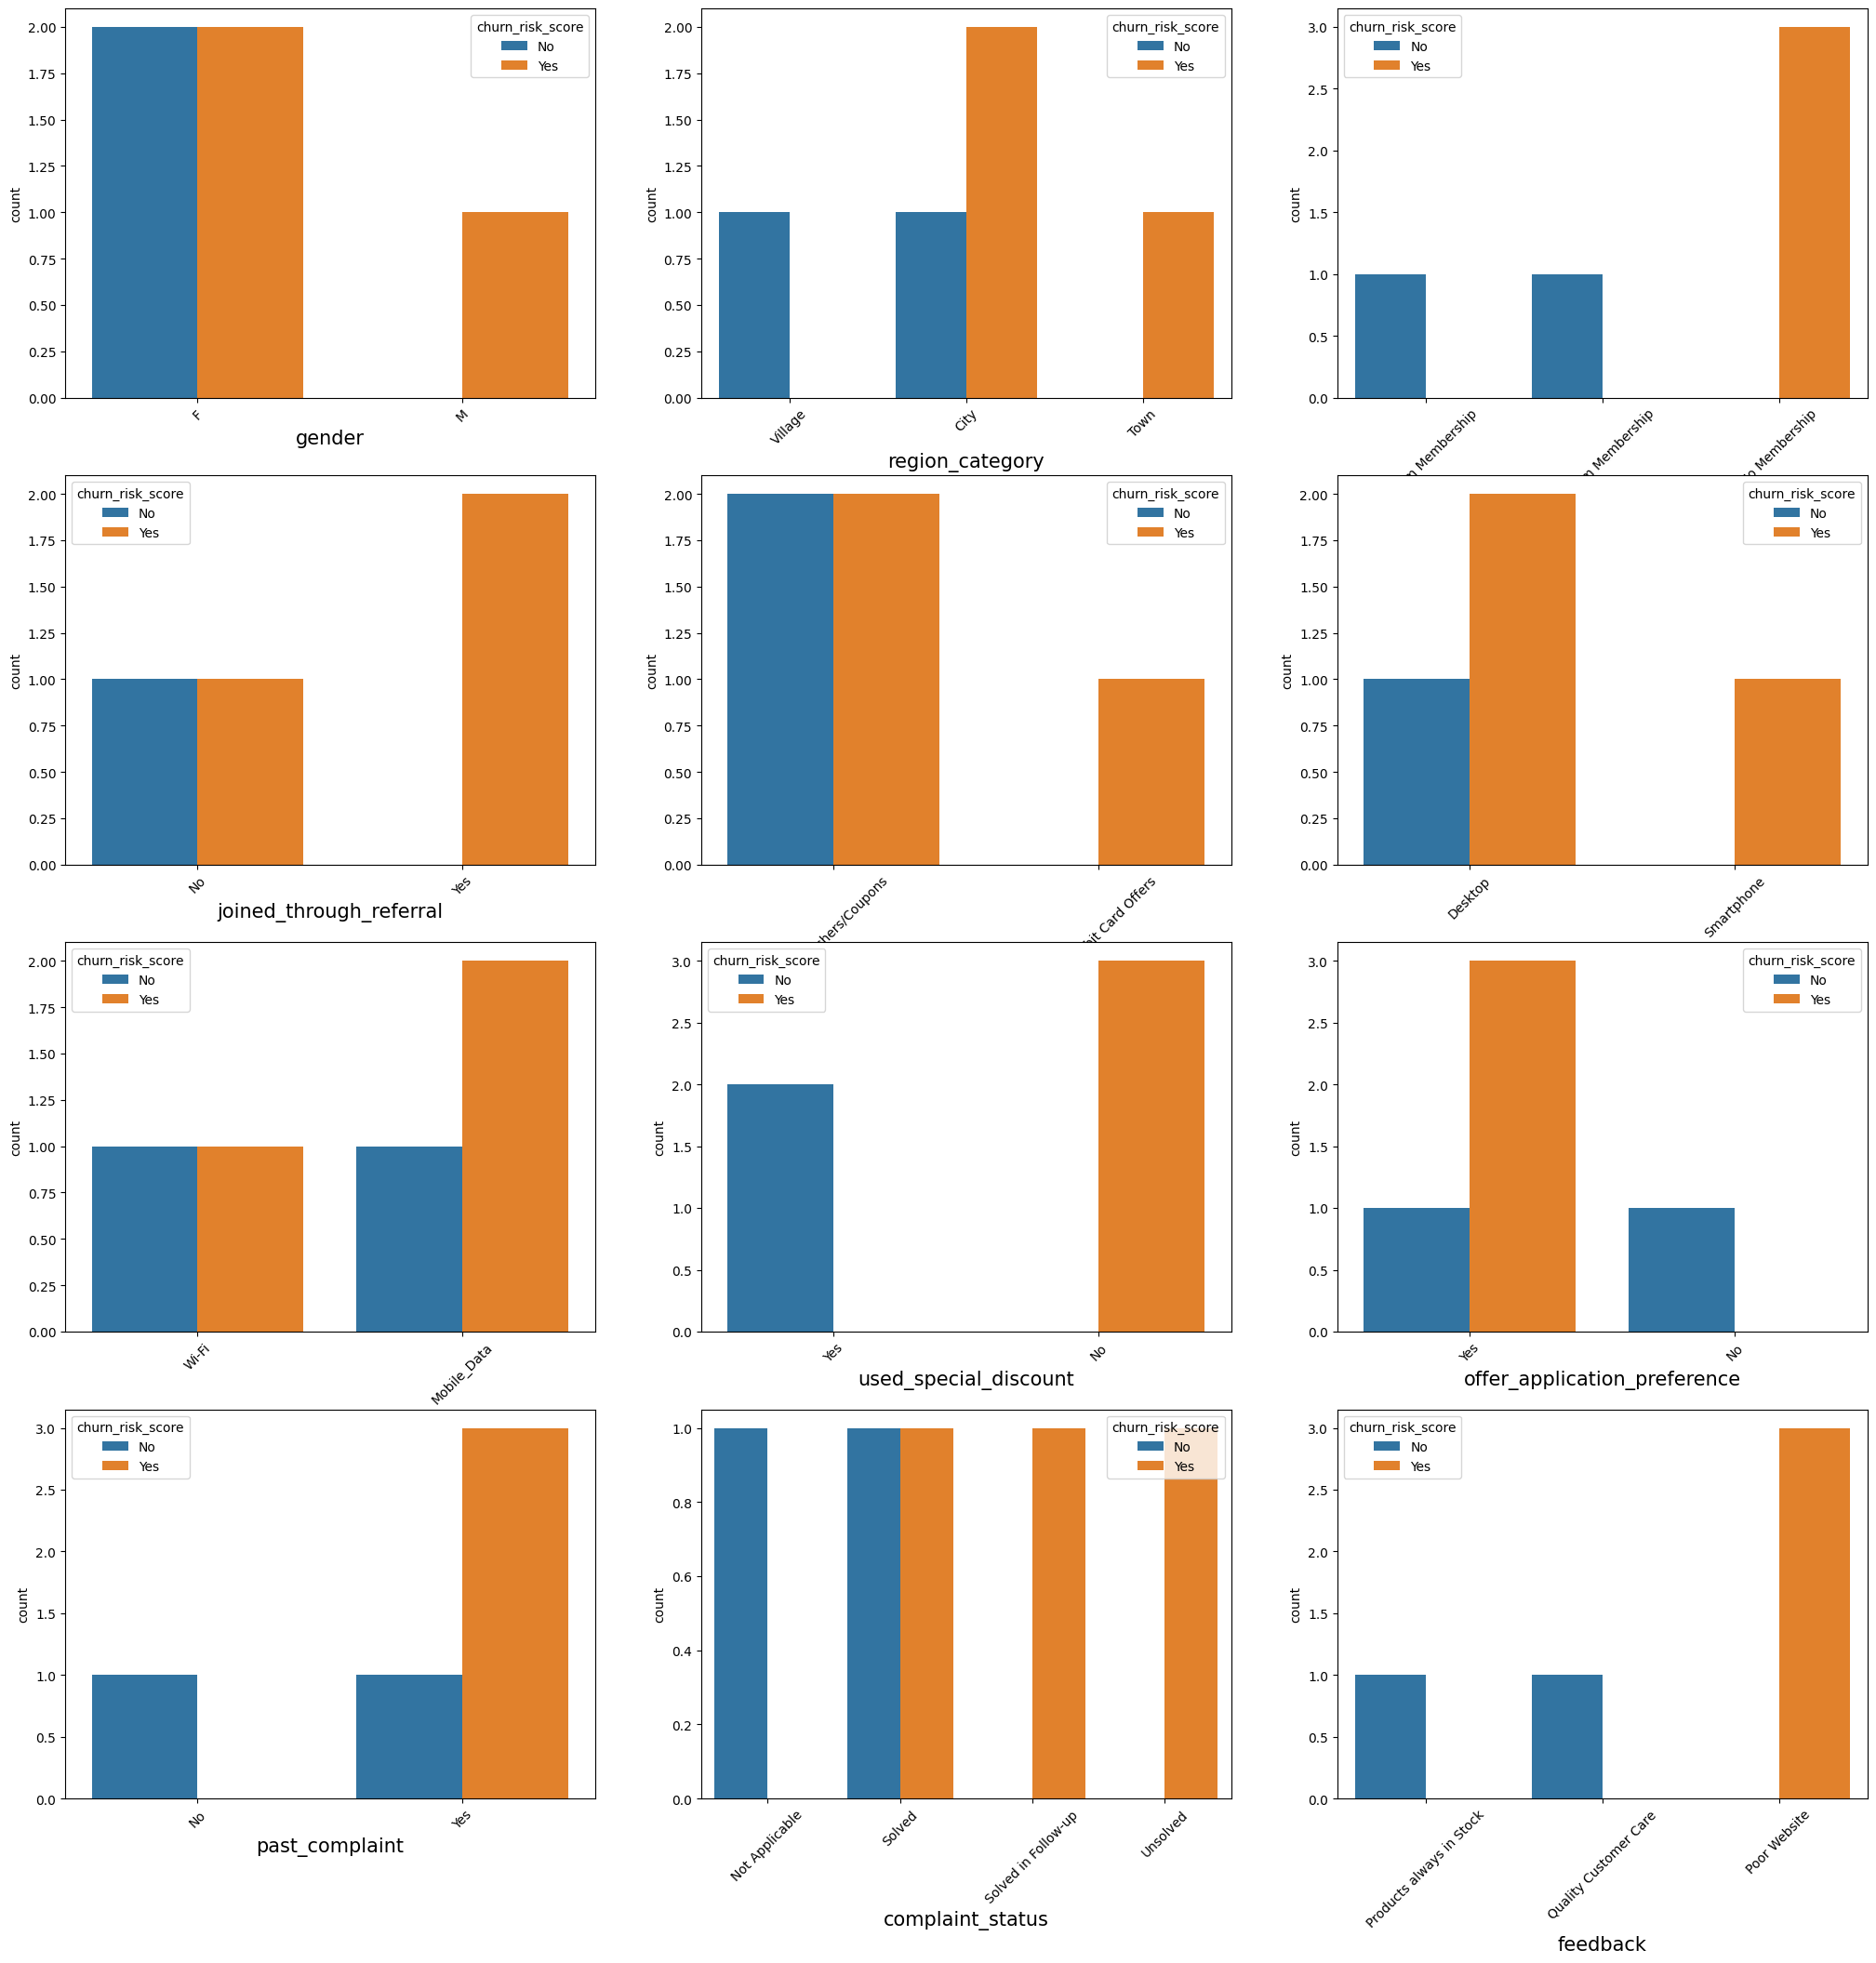

In [22]:

fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(25, 25)) 

for variable, subplot in zip(df_cat1.columns,ax.flatten()):
    
    z = sns.countplot(x = df_cat1[variable],ax=subplot,hue=df_cat1.churn_risk_score)
    
    z.set_xlabel(variable, fontsize = 15)
    
    z.set_xticklabels(z.get_xticklabels(),rotation=45)



## Multivariante Variable:-

In [23]:
df_num1 = df.select_dtypes(exclude='object')

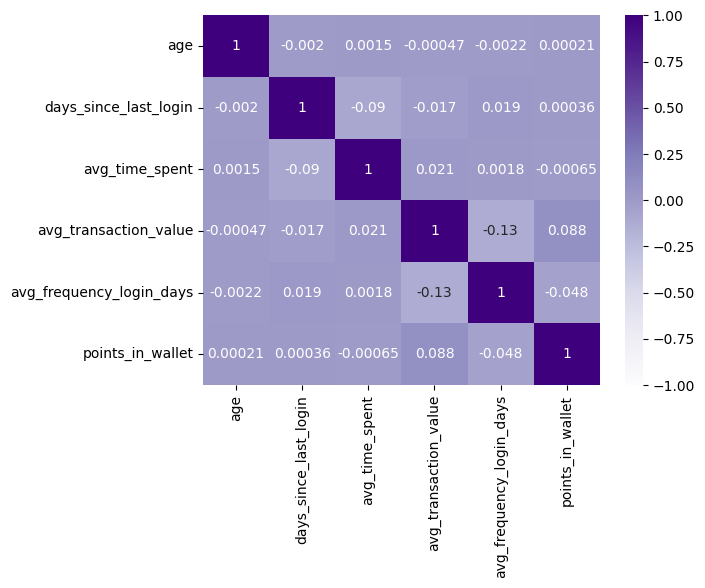

In [24]:
sns.heatmap(data=df.corr(),vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

### 2.Numerical Variable:-

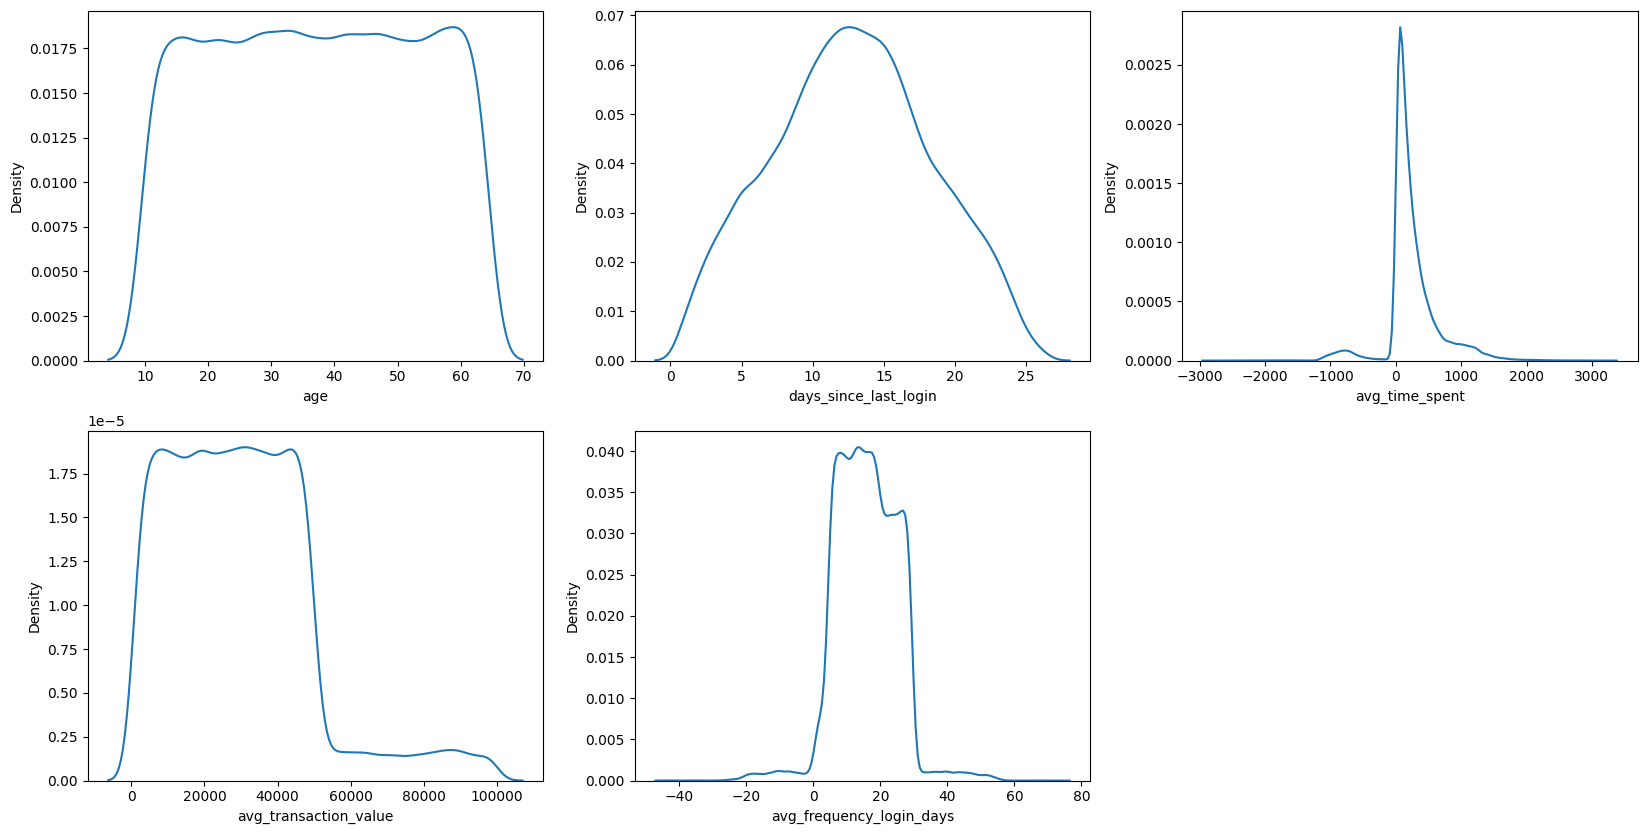

In [25]:

fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10)) 
for variable, subplot in zip(df_num1.columns,ax.flatten()):
    z = sns.kdeplot(x = df_num1[variable] , ax=subplot)      # kernal density
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

# Data Preprocessing

### Finding Missing Value:-

In [26]:
df.isnull().sum()/data.shape[0]*100  #Method -1

age                              0.000000
gender                           0.159494
region_category                 14.673443
membership_category              0.000000
joined_through_referral         14.700476
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
days_since_last_login            5.403871
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.520978
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

In [27]:
df.isnull().sum()                   #Method -2

age                                0
gender                            59
region_category                 5428
membership_category                0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
days_since_last_login           1999
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3522
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

<Axes: >

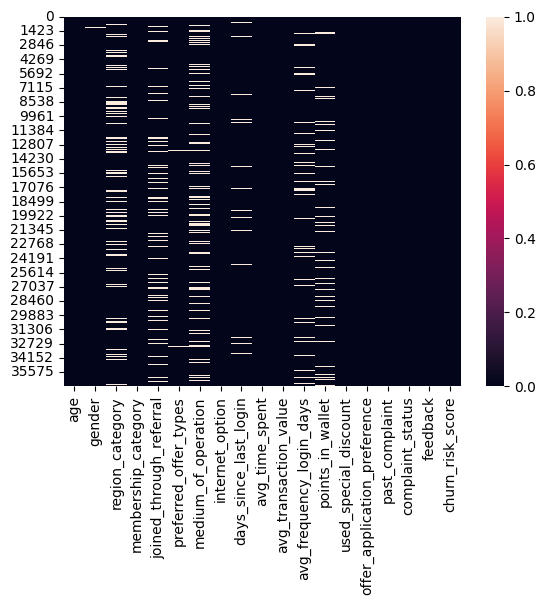

In [28]:
sns.heatmap(df.isnull())           #Method -3

In [29]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['gender',
 'region_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'days_since_last_login',
 'avg_frequency_login_days',
 'points_in_wallet']

#### *** NaN Values In above Variable ***

# Imputation Methods:

## *categorical variable 
[Gender, Region_category, Joined_through_referral,preferred_offer_types,medium_of_operation]
* Imputed by Mode

## *Numerical Variable
[points_in_wallet,days_since_last_login]
* Imputed by Mean

### 1.Gender

In [30]:
df.gender.unique()
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df.gender.isnull().sum()

0

### 2. Region_category

In [31]:
df.region_category.unique()
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df.region_category.isnull().sum()

0

### 3. Joined_through_referral

In [32]:
df.joined_through_referral.unique()
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df.joined_through_referral.isnull().sum()

0

### 3. preferred_offer_types

In [33]:
df.preferred_offer_types.unique()
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df.preferred_offer_types.isnull().sum()

0

### 4. medium_of_operation

In [34]:
df.medium_of_operation.unique()
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])
df.medium_of_operation.isnull().sum()

0

### 5. points_in_wallet

In [35]:
df["points_in_wallet"] = df['points_in_wallet'].replace(to_replace= np.nan, value = 0)

In [36]:
df.points_in_wallet.unique()

array([781.75     ,   0.       , 500.69     , ..., 242.9796255,
       639.51     , 197.2644136])

In [37]:
df["points_in_wallet"] = df['points_in_wallet'].replace(to_replace= 0, value =df['points_in_wallet'].mean())

In [38]:
df.points_in_wallet.unique()

array([781.75      , 622.95120257, 500.69      , ..., 242.9796255 ,
       639.51      , 197.2644136 ])

### 6. days_since_last_login

In [39]:
df["days_since_last_login"] = df['days_since_last_login'].replace(to_replace= np.nan, value = 0)

In [40]:
df.days_since_last_login.unique()

array([17., 16., 14., 11., 20., 23., 10., 19., 15., 13.,  0.,  5., 12.,
        9., 21., 18.,  1., 22.,  4.,  8.,  3.,  6.,  2., 24.,  7., 26.,
       25.])

In [41]:
df['days_since_last_login'] = df['days_since_last_login'].replace(to_replace=0,value=df['days_since_last_login'].mean())

In [42]:
df.days_since_last_login.unique()

array([17.        , 16.        , 14.        , 11.        , 20.        ,
       23.        , 10.        , 19.        , 15.        , 13.        ,
       12.06909602,  5.        , 12.        ,  9.        , 21.        ,
       18.        ,  1.        , 22.        ,  4.        ,  8.        ,
        3.        ,  6.        ,  2.        , 24.        ,  7.        ,
       26.        , 25.        ])

### 7. avg_frequency_login_days

In [43]:
df["avg_frequency_login_days"] = df['avg_frequency_login_days'].replace(to_replace= np.nan, value = 0)

In [44]:
df.avg_frequency_login_days.unique()

array([17.        , 10.        , 22.        , ..., -9.32551114,
       -8.75932971, 27.83992744])

In [45]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace(to_replace=0,value=df['avg_frequency_login_days'].mean())

In [46]:
df.avg_frequency_login_days.unique()

array([17.        , 10.        , 22.        , ..., -9.32551114,
       -8.75932971, 27.83992744])

In [47]:
df.points_in_wallet.isnull().sum()

0

## No Missing Value

In [48]:
df.isnull().sum()  

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

## checking duplicate

In [150]:
df[df.duplicated()]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


# outliers:

In [50]:
df_num1.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet'],
      dtype='object')

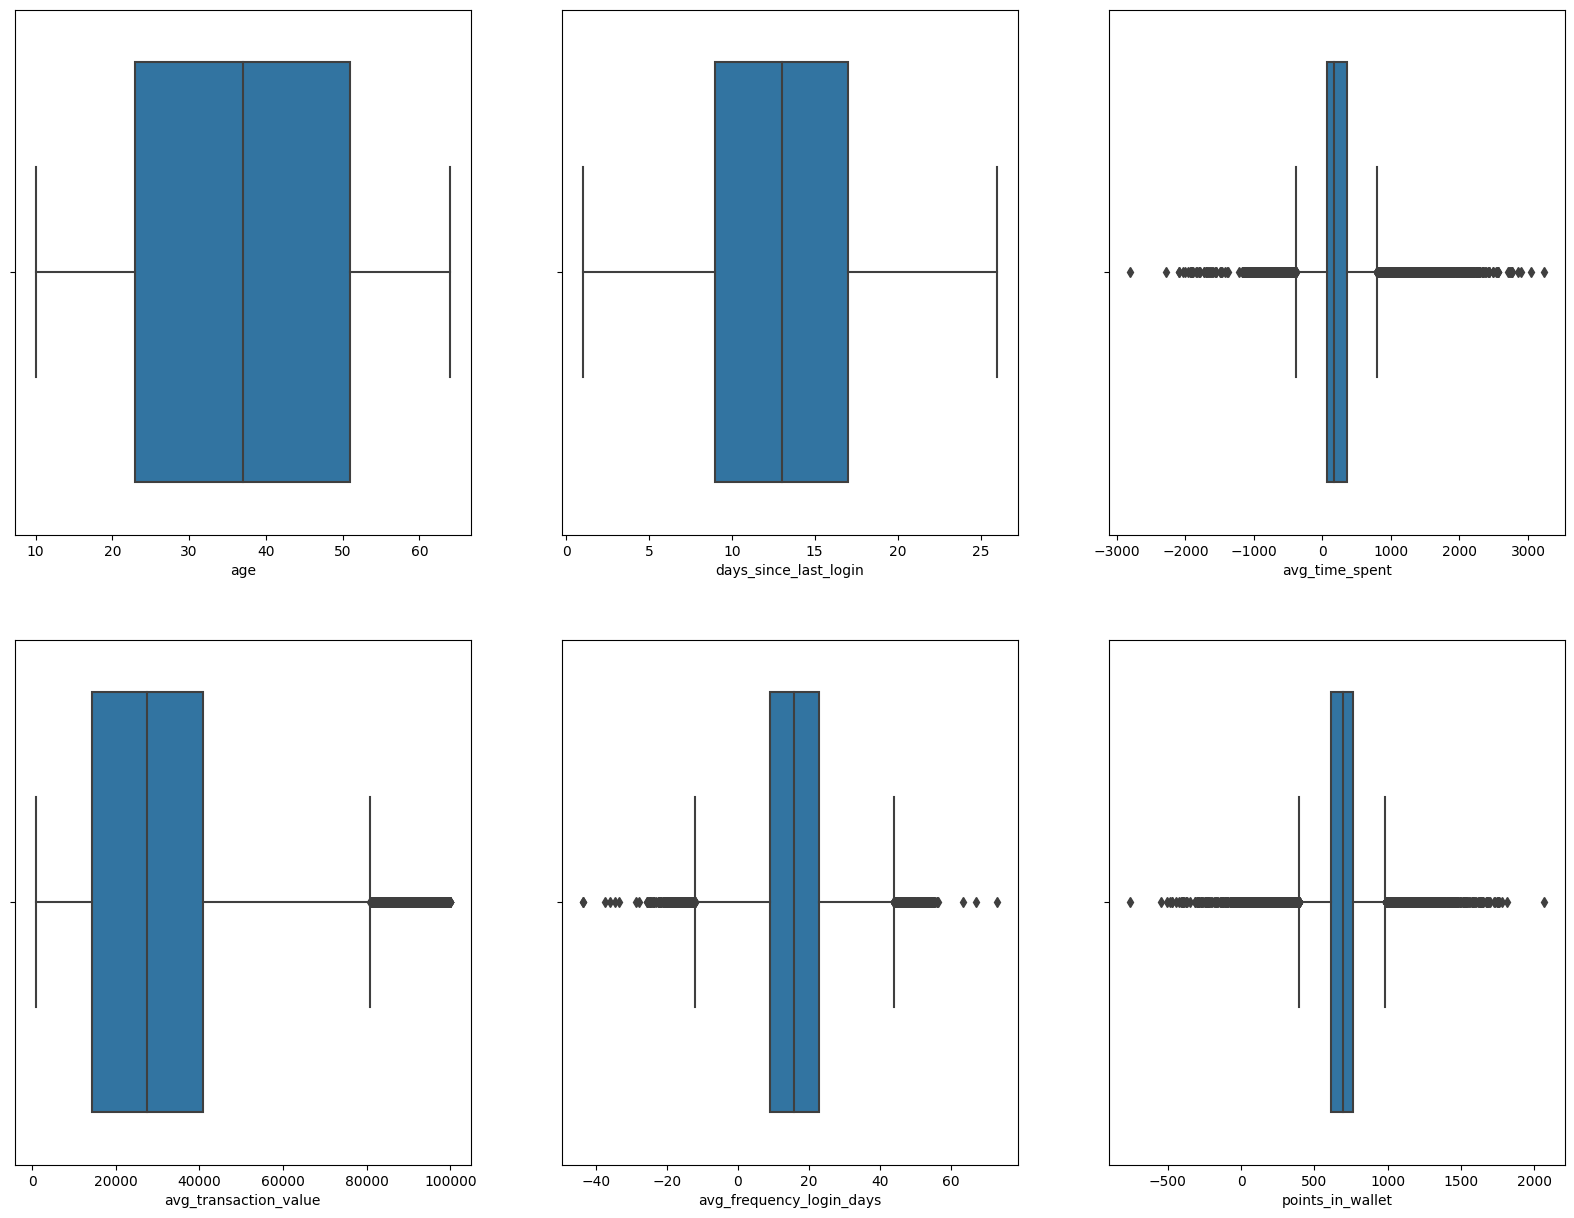

In [52]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20, 15))

for variable, subplot in zip(df_num1.columns,ax.flatten()):
    
    z = sns.boxplot(x = df_num1[variable], orient = "h",whis=1.5 , ax=subplot) 
    
    z.set_xlabel(variable, fontsize = 10)

In [53]:
Q1 = df_num1.quantile(0.25) 
Q3 = df_num1.quantile(0.75) 
IQR = Q3 - Q1 

outlier = pd.DataFrame((df_num1 < (Q1 - 1.5 * IQR)) | (df_num1 > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column days_since_last_login are 0
Total number of Outliers in column avg_time_spent are 4677
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column avg_frequency_login_days are 564
Total number of Outliers in column points_in_wallet are 4367


## Removal of Outliers:-

In [54]:
data_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [55]:
data_iqr.shape

(27224, 19)

In [56]:
data_iqr.reset_index(inplace=True)

In [57]:
data_iqr.drop('index',axis=1, inplace=True)

In [58]:
data_iqr.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17.0,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,No
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,622.951203,Yes,No,Yes,Solved,Quality Customer Care,No
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,Yes
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,Yes
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,Yes


## Categorical Data Encoding:

In [59]:
#Import Lib:-

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

### 1. Ordinal Encoding

In [60]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", 
                                                                "Gold Membership","Platinum Membership","Premium Membership"]])

data_iqr['membership_category'] = orderencoding_membership_category.fit_transform(data_iqr['membership_category'] 
                                                                        .values.reshape(-1,1))

In [61]:
data_iqr['membership_category'].unique()

array([4., 5., 0., 3., 2., 1.])

In [62]:
orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable",
                                                               "Unsolved","Solved","Solved in Follow-up"]])

data_iqr['complaint_status'] = orderencoding_complaint_status.fit_transform(data_iqr['complaint_status'].
                                                                            values.reshape(-1,1)) 


In [63]:
data_iqr['complaint_status'].unique()

array([1., 3., 4., 2., 0.])

### 2. Label Encoding

In [64]:
df.feedback.unique()

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [65]:
labelencoder_feedback = LabelEncoder() 

data_iqr['feedback'] = labelencoder_feedback.fit_transform(data_iqr.feedback) 

In [66]:
data_iqr['feedback'].unique()

array([4, 5, 3, 0, 2, 1, 7, 8, 6])

#### *feedback is not order format so we use label encoded

## imputed get dummies

In [67]:
data_iqr.shape

(27224, 19)

In [68]:
df_get = pd.get_dummies(data_iqr,drop_first=True)

In [69]:
df_get.shape

(27224, 23)

# Features scaling:

In [70]:
num_col = df_get[['age','days_since_last_login','avg_time_spent','avg_transaction_value',
                'avg_frequency_login_days','points_in_wallet']]

In [71]:
df_get.drop(columns=['age','days_since_last_login','avg_time_spent','avg_transaction_value',
                'avg_frequency_login_days','points_in_wallet'],axis=1,inplace=True)

In [72]:
#import  lib 
from sklearn.preprocessing import StandardScaler

In [73]:
standard_scaling = StandardScaler()

num_scaling =standard_scaling.fit_transform(num_col)

In [74]:
df_scaled = pd.DataFrame(num_scaling, columns=num_col.columns)

In [75]:
df_scaled.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,-1.208991,0.764588,0.522355,1.573149,0.132956,1.136232
1,-0.325507,0.579948,0.553971,-0.881290,-0.766704,-0.612399
2,0.431765,0.210667,1.715732,-0.380916,0.775570,-1.958692
3,-0.009977,-0.343253,-0.847262,-0.123503,-1.280796,-1.221244
4,-0.388613,1.318508,-0.515821,-0.169693,0.004433,-0.170736


In [76]:
df_final = pd.concat([df_get,df_scaled], axis=1 )

In [77]:
df_final.shape

(27224, 23)

In [78]:
df_final.head()

,membership_category,complaint_status,feedback,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,churn_risk_score_Yes,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,4.0,1.0,4,0,0,1,0,1,0,1,0,0,1,1,1,0,0,-1.208991,0.764588,0.522355,1.573149,0.132956,1.136232
1,5.0,3.0,5,0,0,0,0,1,0,1,0,1,0,1,0,1,0,-0.325507,0.579948,0.553971,-0.881290,-0.766704,-0.612399
2,0.0,4.0,3,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0.431765,0.210667,1.715732,-0.380916,0.775570,-1.958692
3,0.0,2.0,3,1,0,0,1,1,0,1,0,1,0,0,1,1,1,-0.009977,-0.343253,-0.847262,-0.123503,-1.280796,-1.221244
4,0.0,3.0,3,0,0,0,0,0,0,0,1,1,0,0,1,1,1,-0.388613,1.318508,-0.515821,-0.169693,0.004433,-0.170736


# spliting data (train and test )

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train = df_final.drop(['churn_risk_score_Yes'],axis=1)

test = df_final['churn_risk_score_Yes']

In [81]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train, test, test_size = 0.20, random_state = 42)

# Model Building:

## 1. Decision tree:

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
tree_model = DecisionTreeClassifier(criterion='gini')

In [84]:
tree_model.fit(X_train1,y_train1)                #model fit

DecisionTreeClassifier()

In [85]:
tree_model.score(X_train1,y_train1)            # model train accuracy score

1.0

In [86]:
tree_pred = tree_model.predict(X_test1)

In [87]:
tree_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [90]:
tree_report = classification_report(y_test1,tree_pred)     # model test accuracy score

In [91]:
print(tree_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2467
           1       0.92      0.93      0.92      2978

    accuracy                           0.92      5445
   macro avg       0.92      0.92      0.92      5445
weighted avg       0.92      0.92      0.92      5445



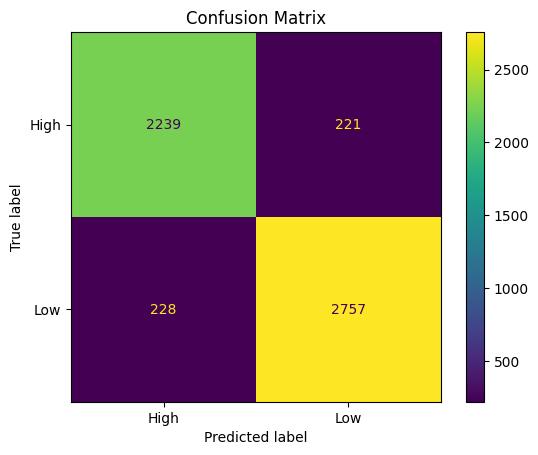

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(tree_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()                                                  # model confustion matrix

In [186]:
print(tree_matrix)

[[2239  221]
 [ 228 2757]]


### 2. Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf_model = RandomForestClassifier(n_estimators=100)

In [97]:
rf_model.fit(X_train1,y_train1)

RandomForestClassifier()

In [98]:
rf_model.score(X_train1,y_train1)

1.0

In [197]:
rf_pred = rf_model.predict(X_test1)

In [198]:
rf_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [199]:
rf_report = classification_report(y_test1,rf_predct)

In [200]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2467
           1       0.93      0.96      0.94      2978

    accuracy                           0.94      5445
   macro avg       0.94      0.93      0.94      5445
weighted avg       0.94      0.94      0.94      5445



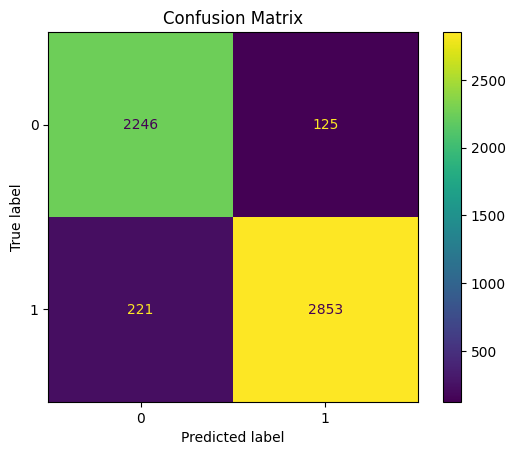

In [208]:
conf_matrix = confusion_matrix(rf_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=None)
cf.plot()
plt.title("Confusion Matrix")
plt.show()   

## 2. Ada Boosting:-

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
ada_model = AdaBoostClassifier( n_estimators=50 )

In [107]:
ada_model.fit(X_train1,y_train1)

AdaBoostClassifier()

In [108]:
ada_model.score(X_train1,y_train1)

0.9373249460489462

In [109]:
ada_pred = ada_model.predict(X_test1)

In [110]:
ada_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [111]:
ada_report = classification_report(y_test1,ada_pred)

In [112]:
print(ada_report)`

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2467
           1       0.91      0.98      0.95      2978

    accuracy                           0.94      5445
   macro avg       0.95      0.94      0.94      5445
weighted avg       0.94      0.94      0.94      5445



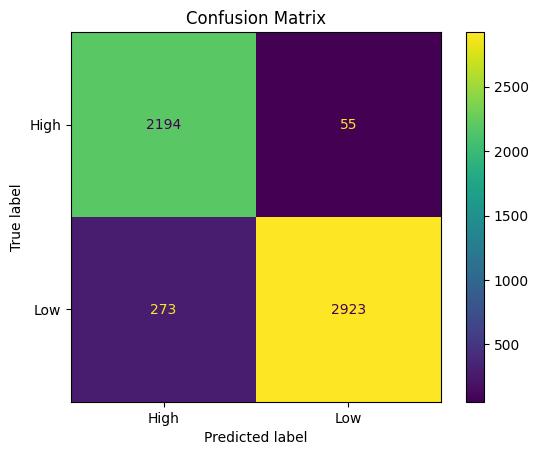

In [202]:
conf_matrix = confusion_matrix(ada_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()   

## 3.Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_model = LogisticRegression() 

In [115]:
log_model.fit(X_train1,y_train1)

LogisticRegression()

In [116]:
log_model.score(X_train1,y_train1)

0.8571559759401258

In [117]:
log_pred = log_model.predict(X_test1)

In [118]:
log_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [183]:
log_report = classification_report(log_pred,y_test1)

In [184]:
print(log_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2480
           1       0.88      0.88      0.88      2965

    accuracy                           0.87      5445
   macro avg       0.87      0.87      0.87      5445
weighted avg       0.87      0.87      0.87      5445



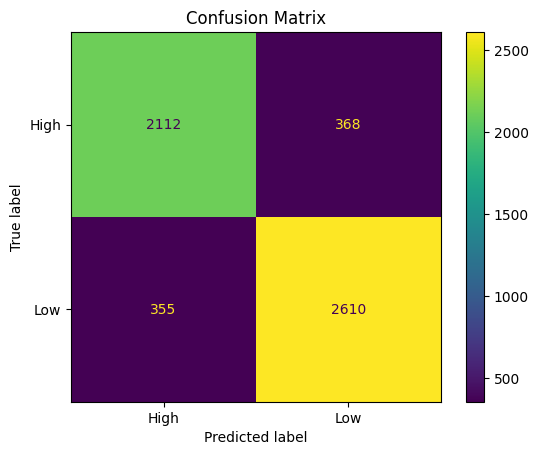

In [203]:
conf_matrix = confusion_matrix(log_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")

### 4. KNeighborsClassifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [126]:
knn_model.fit(X_train1,y_train1)

KNeighborsClassifier()

In [127]:
knn_model.score(X_train1,y_train1)

0.9244226089352128

In [128]:
knn_pred = knn_model.predict(X_test1)

In [129]:
knn_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [131]:
knn_report = classification_report(y_test1,knn_pred)

In [132]:
print(knn_report)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2467
           1       0.88      0.93      0.90      2978

    accuracy                           0.89      5445
   macro avg       0.89      0.88      0.89      5445
weighted avg       0.89      0.89      0.89      5445



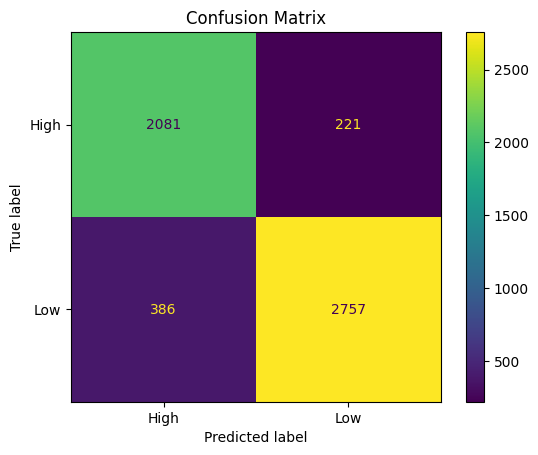

In [204]:
conf_matrix = confusion_matrix(knn_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()   

## 5. XG Boost:

In [133]:
from xgboost import XGBClassifier

In [134]:
xg_model = XGBClassifier()

In [135]:
xg_model.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [136]:
xg_model.score(X_train1,y_train1)

0.9854906102208549

In [137]:
xg_pred = xg_model.predict(X_test1)

In [138]:
xg_pred

array([1, 1, 0, ..., 1, 0, 1])

In [139]:
xg_report = classification_report(y_test1,xg_pred)

In [140]:
print(xg_report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2467
           1       0.93      0.96      0.95      2978

    accuracy                           0.94      5445
   macro avg       0.95      0.94      0.94      5445
weighted avg       0.94      0.94      0.94      5445



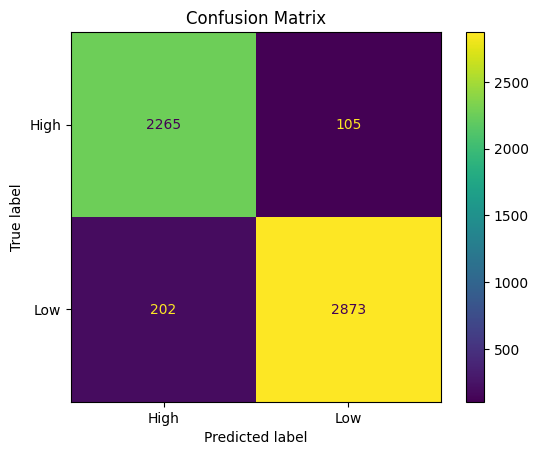

In [206]:
conf_matrix = confusion_matrix(xg_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()   

# 6. Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
naive_model = GaussianNB()

In [143]:
naive_model.fit(X_train1,y_train1)

GaussianNB()

In [144]:
naive_model.score(X_train1,y_train1)

0.8581661233298131

In [145]:
naive_pred = naive_model.predict(X_test1)

In [146]:
naive_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [147]:
naive_report = classification_report(y_test1,naive_pred)

In [148]:
print(naive_report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2467
           1       0.88      0.87      0.88      2978

    accuracy                           0.87      5445
   macro avg       0.87      0.87      0.87      5445
weighted avg       0.87      0.87      0.87      5445



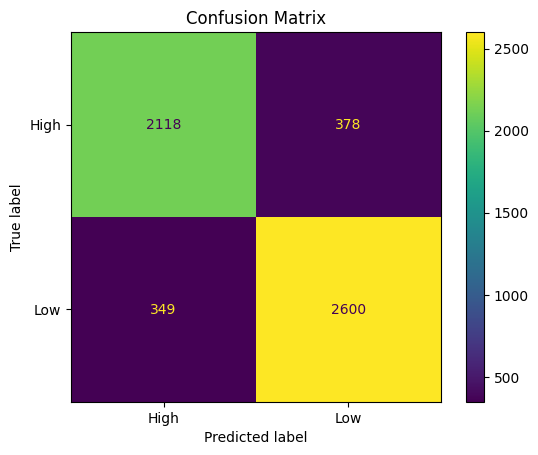

In [207]:
conf_matrix = confusion_matrix(naive_pred,y_test1)

cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["High","Low"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()   

In [214]:
pd.DataFrame({'Model Name':["Logistic_Regression","Decision_Tree ",'Random_Forest','XGBoost','naive_bayes','ada_Boosting','knn'],
              'Train_Accuracy':['0.85','1.','1.','0.98','0.85','0.93','0.92'],
              'Test_Accuracy':['0.87','0.92','0.94','0.94','0.87','0.94','0.89']})

,Model Name,Train_Accuracy,Test_Accuracy
0,Logistic_Regression,0.85,0.87
1,Decision_Tree,1.,0.92
2,Random_Forest,1.,0.94
3,XGBoost,0.98,0.94
4,naive_bayes,0.85,0.87
5,ada_Boosting,0.93,0.94
6,knn,0.92,0.89


## Conclusion:-

   * Aad_Boosting is giving good Test Accuracy overall 

   * Even though Aad_Boosting is giving good Test Accuracy overall but we need to focus on the customers
      who are leaving i.e. 1, so that we 
      can retain them with some discount offer on membership,
